# XOR with Neural Networks

NEURAL NETWORKS WITH BACKPROPAGATION FOR XOR USING ONE HIDDEN LAYER
http://www.bogotobogo.com/python/python_Neural_Networks_Backpropagation_for_XOR_using_one_hidden_layer.php

In [19]:
import numpy as np
import pandas 
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2


class NeuralNetwork:

    def __init__(self, layers, activation='tanh'):
        self.error_list = list()
        
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_prime

        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        for i in range(1, len(layers) - 1):
            print(i)
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000): 
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
         
        for k in range(epochs):
            if k % 10000 == 0: print ('epochs:', k)
            
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            self.error_list.append(error) # add error to output list
            deltas = [error * self.activation_prime(a[-1])]

            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

        
        return error
    
    
    def predict(self, x): 
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)      
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a






In [83]:
nn = NeuralNetwork([2000,20,1])

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 1, 1, 0])

nn.fit(X, y, epochs=10000)


1
epochs: 0


array([-0.0099507])

In [84]:
for e in X:
    print(e,nn.predict(e))

[0 0] [-0.00729344]
[0 1] [0.98725334]
[1 0] [0.98678704]
[1 1] [0.02287344]


In [69]:
nn.error_list

[array([-0.92302989]),
 array([-0.91483995]),
 array([0.53376213]),
 array([0.33382312]),
 array([-0.93039322]),
 array([0.05851474]),
 array([0.05812084]),
 array([0.29221639]),
 array([0.05463905]),
 array([-0.92995055]),
 array([0.26981157]),
 array([-0.93157651]),
 array([-0.92492689]),
 array([0.06978926]),
 array([0.06912983]),
 array([-0.91359728]),
 array([0.07838625]),
 array([0.29567679]),
 array([-0.91713935]),
 array([0.27357035]),
 array([0.24000445]),
 array([0.21619854]),
 array([-0.92348467]),
 array([0.07867205]),
 array([-0.91401625]),
 array([0.2368294]),
 array([0.21522385]),
 array([0.19846406]),
 array([0.18498341]),
 array([0.07762041]),
 array([-0.92340142]),
 array([0.18751637]),
 array([0.08213369]),
 array([0.08101616]),
 array([0.07994203]),
 array([-0.91956845]),
 array([-0.90585056]),
 array([-0.88746505]),
 array([-0.86202657]),
 array([0.27930135]),
 array([-0.87887267]),
 array([0.1647444]),
 array([-0.86571091]),
 array([0.18008241]),
 array([0.1704923

In [70]:
#nn = NeuralNetwork([2,2,1])
nn.weights

[array([[ 0.65898657,  0.98962697,  2.11435302],
        [-1.8828921 , -1.21979528, -1.74966041],
        [-2.26244528,  1.44944788, -1.06573576]]),
 array([[-2.57445817],
        [-1.24943999],
        [ 2.50527835]])]

In [27]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

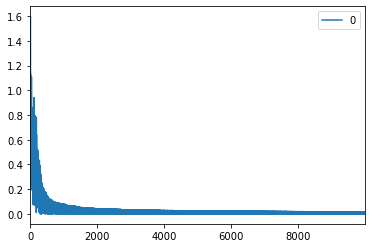

In [82]:
pandas.DataFrame(np.abs(nn.error_list[:10000])).plot()

In [85]:
np.sqrt(np.sqrt(2000))

6.68740304976422